### Description

### Start with Importing libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('mushroom.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
print('Total no of rows and columns in the datasets are: ',data.shape)

Total no of rows and columns in the datasets are:  (8124, 23)


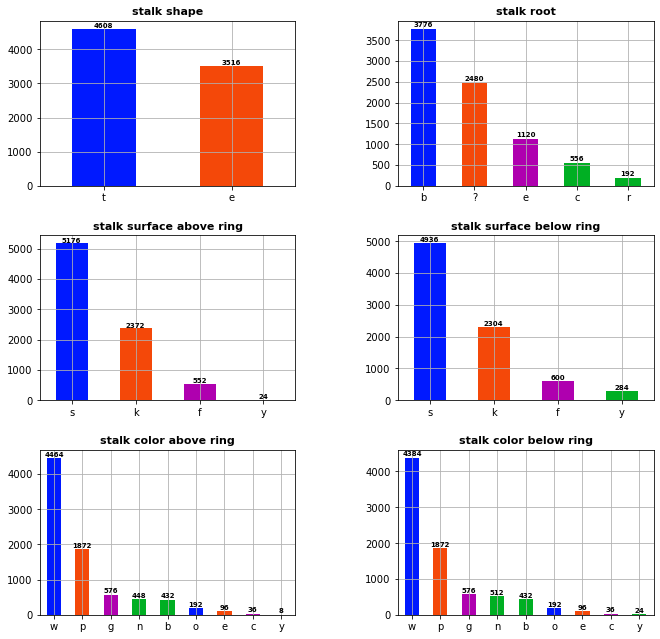

In [14]:
def graph(name, u):
    data[name].value_counts().plot(kind="bar",ax=u, color=colors)
    
    plt.setp(u.get_xticklabels(), rotation=0)
    u.grid(True)
    u.set_title(name.replace("-"," "), fontsize=11, fontdict={"fontweight": "bold"})
    
    for p in u.patches:
        text = str(int(p.get_height()))
        u.annotate(text, (p.get_x()+p.get_width()/2, p.get_height()+100),
                   ha="center", va='center', fontsize=7, fontweight="bold")

# EXPLORATORY DATA ANALYSIS

fig2, ax2 = plt.subplots(3,2, figsize=(11, 10), gridspec_kw={"wspace" : 0.4, "hspace" : 0.3, "top": 0.95})

colors=["#0019ff","#f44809","#af00af","#00af23","#00af23"]

graph("stalk-shape",ax2[0,0])
graph("stalk-root",ax2[0,1])
graph("stalk-surface-above-ring",ax2[1,0])
graph("stalk-surface-below-ring",ax2[1,1])
graph("stalk-color-above-ring",ax2[2,0])
graph("stalk-color-below-ring",ax2[2,1])
plt.rcParams['axes.axisbelow'] = True

In [17]:
X = data.drop(["class"], axis=1)
y = data["class"]
X = pd.get_dummies(X)

le = LabelEncoder()
y = le.fit_transform(y)

### Classification and metrics for logistic regression classifier

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = LogisticRegression(solver="lbfgs").fit(X_train,y_train)
predicted = clf.predict(X_test)
predicted_proba = clf.predict(X_test)

print("Accuracy is: "+ str(clf.score(X_test,y_test)))
print("Recall score is: " + str(round(recall_score(y_test, predicted),3)))
print("Precision score is: " + str(round(precision_score(y_test, predicted),3)))
print("F1 score is: " + str(round(f1_score(y_test, predicted),3)))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, predicted))

Accuracy is: 1.0
Recall score is: 1.0
Precision score is: 1.0
F1 score is: 1.0

Confusion matrix:
[[863   0]
 [  0 762]]
